<a href="https://colab.research.google.com/github/Emersonmiady/covid-19-br/blob/main/covid_19_brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19: análise dos casos e mortes no Brasil
---
A palavra que define 2020, para mim, é "mudança". A humanidade teve que se adaptar, mudar seu estilo de vida para dentro de casa, no isolamento social. 

Temos tanto defensores da volta a normalidade, quanto aqueles que preferem a continuação da quarentena, sendo pontos de vista bem interessantes, dado que, respectivamente, o **impacto econômico** por conta da **COVID-19** será cada vez mais evidente em alguns países, versus o **número de pessoas contaminadas** que só tende a crescer.

<center><img src='https://raw.githubusercontent.com/Emersonmiady/bootcamp-alura-ds/main/modulo_1/figures/closed.jpg' width='800' height='500'></center>

Agora indo para alguns dados, temos que, de acordo com um [*dashboard*](https://coronavirus.jhu.edu/map.html) em tempo real criado pelo Hospital universitário de Maryland Johns Hopkins (EUA):

- O número de casos confirmados no mundo pelo novo coronavírus é de, aproximadamente, 52,3 milhões;
- Ainda no caso mundial, o número de mortes fica próximo dos 1,3 milhões.

**Observação:** Os dados acima são do dia 12/11 de 2020.

Ao meu ver, esses valores assustam bastante, mesmo sendo uma parcela pequena da população mundial, mataram mais que a primeira pandemia (gripe suína - H1N1) do século XXI, este com cerca de 20 mil mortes.

<center><img src='https://raw.githubusercontent.com/Emersonmiady/bootcamp-alura-ds/main/modulo_1/figures/covid-19.jpg' width='600' height='350'></center>

Mas o que está acontecendo no Brasil? Será que a volta a normalidade é recomendada, dado a situação da pandemia no país brasileiro?

É isso que vou investigar nesse artigo, vamos ver o que podemos contribuir para a comunidade, analisando dados do COVID-19 no Brasil com a Ciência de Dados.



## Resumo

A análise foi baseada em um dataset provido pelo Brasil.io, tratando os **casos de COVID-19 no Brasil**.

- Sobre as Unidades Federativas:
  -	As UF's que possuem os maiores números de casos acumulados / 100 mil habitantes são, em ordem decrescente: **RR**, **DF** e **AP**. O pior deles é Roraima, que vem apresentando uma taxa de crescimento maior nos últimos tempos;

  - As UF's que possuem os maiores números de mortes acumuladas / 100 mil habitantes são, em ordem decrescente: **DF**, **RJ** e **MT**. Mesmo tendo o DF como primeiro nesse caso, eu considero RJ o pior dos três, pois sua população absoluta é **muito** diferente, comparando com as outras duas UF's, tendo **muitas** pessoas, tanto em números absolutos quanto em porcentagem da população, que se contaminaram com o COVID-19.

- Sobre as regiões:
  - A região que possui o maior número de casos/mortes acumulados/as por 100 mil habitantes é o **Centro-Oeste**. Essa região é a que deve tomar mais cuidado, pois apresenta a maior taxa de crescimento em todas essas medidas;

  - A atenção deve-se atentar principalmente em **DF** e **MT**, pois além de serem os responsáveis por aumentar as medidas acima, apresentam os maiores números de mortes acumuladas / 100 mil habitantes.
  
- Sobre o Brasil como um todo:
  - A porcentagem de mortes no dia 27/10, pelas pessoas que pegaram COVID-19 é de **2,9%**;
  - Os maiores valores das mortes diárias ficaram sob um período **mais longo**, se comparado com os maiores valores dos casos diários da doença.

Em todas as nossas análises móveis, notamos que os maiores valores diários foram por volta de Julho e Setembro.

Felizmente, os novos valores diários já alcançaram seus picos, e suas taxas de crescimento, no caso dos números acumulativos por 100 mil habitantes, estão decaindo. Aparentemente já passamos da pior fase! (uhuu!)

## Descrição dos dados 
---

### Introdução


A análise foi baseada em um *dataset* provido pelo **Brasil.io**, uma organização que possui a seguinte premissa:

> "Nossa missão é tornar acessíveis os dados brasileiros de interesse público e temos como valores principais a transparência e colaboração. Dessa maneira, tudo o que produzimos pode ser verificável, pois além de disponibilizarmos os dados em formatos abertos, nosso software é livre e produzimos tudo isso de maneira colaborativa. Entre em nosso chat para saber como colaborar ou em nosso repositório de código no GitHub."

Esses dados possuem informações sobre as UF's e os municípios brasileiros, englobando o período de 25/02 até 09/11 de 2020. Eles podem ser encontrados [nessa página](https://brasil.io/dataset/covid19/caso/).




In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import datetime as dt
from datetime import date, datetime

In [2]:
# Lendo os arquivos
cases = pd.read_csv('/content/drive/My Drive/Alura Bootcamp DS/Módulo 1/datasets/caso.csv')

### Dicionário das variáveis

In [3]:
# Algumas informações dos dados
cases['date'] = pd.to_datetime(cases['date'])
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950679 entries, 0 to 950678
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   date                            950679 non-null  datetime64[ns]
 1   state                           950679 non-null  object        
 2   city                            944245 non-null  object        
 3   place_type                      950679 non-null  object        
 4   confirmed                       950679 non-null  int64         
 5   deaths                          950679 non-null  int64         
 6   order_for_place                 950679 non-null  int64         
 7   is_last                         950679 non-null  bool          
 8   estimated_population_2019       946976 non-null  float64       
 9   estimated_population            946976 non-null  float64       
 10  city_ibge_code                  946976 non-null  float64

Da tabela acima, temos a seguinte quantidade de tipos de valores:
- 1 temporal;
- 3 strings;
- 3 inteiros;
- 1 booleano;
- 5 contínuos.

In [4]:
# Quantidade de valores únicos de colunas que não foram especificadas
# na documentação do Brasil.io
columns = ['state', 'city']

for column in columns:
  print(f'A coluna {column} possui: {cases[column].nunique()} valores únicos.\n')

A coluna state possui: 27 valores únicos.

A coluna city possui: 5296 valores únicos.



Esse arquivo *.csv* possui 13 colunas, sendo elas:
- `date`: data de coleta dos dados no formato YYYY-MM-DD:
  - 25/02 até 09/11 de 2020.
- `state`: sigla da unidade federativa:
  - 27 UF's.
- `city`: nome do Município (em branco quando é Estado):
  - 5296 municípios.
- `place_type`: o tipo de local:
  - state: Estado;
  - city: Município.
- `confirmed`: número de casos confirmados.
- `deaths`: número de mortes.
- `order_for_place`: número que indentifica a ordem do registro para este local.
- `is_last`: campo pré-computado que diz se esse registro é o mais novo para esse local:
  - True: sim;
  - False: não.
- `estimated_population_2019`: população estimada para esse município/estado em 2019, segundo o IBGE.
- `estimated_population`: população estimada para esse município/estado em 2020, segundo o IBGE.
- `city_ibge_code`: código IBGE do local.
- `confirmed_per_100k_inhabitants`: número de casos confirmados por 100.000 habitantes.
- `death_rate`: taxa de mortalidade (mortes / confirmados).

**Observações:**
- Na variável `order_for_place`, o registro referente ao primeiro boletim em que esse local aparecer será contabilizado como 1 e os demais boletins incrementarão esse valor.
- A coluna `estimated_population_2019` possui valores desatualizados, prefira usar a coluna estimated_population.
- Quase todas essas informações são tiradas desse [link](https://github.com/turicas/covid19-br/blob/master/api.md#casos).


## Uma breve análise dos dados
---

<center><img src='https://raw.githubusercontent.com/Emersonmiady/data-science/master/img/analytics.jpg' width='600' height='400'></center>

### Manipulação do Dataframe

#### Preparando os dados

O *dataset* possui 950.679 linhas e 13 colunas. Dado todas essas informações, e da prévia do dataframe abaixo, conseguimos separar as nossas anáises de acordo com as variáveis `date`, `state`, `city`, `place_type` ou `is_last`.



In [5]:
# Formato do dataframe
print(f'Formato do dataframe: {cases.shape}')

# Prévia dos dados
cases.head()

Formato do dataframe: (950679, 13)


,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-09,AC,NaN,state,31788,701,238,True,881935.0,894470.0,12.0,3553.83635,0.0221
1,2020-11-08,AC,NaN,state,31707,699,237,False,881935.0,894470.0,12.0,3544.78071,0.0220
2,2020-11-07,AC,NaN,state,31575,699,236,False,881935.0,894470.0,12.0,3530.02337,0.0221
3,2020-11-06,AC,NaN,state,31326,697,235,False,881935.0,894470.0,12.0,3502.18565,0.0222
4,2020-11-05,AC,NaN,state,31248,697,234,False,881935.0,894470.0,12.0,3493.46540,0.0223


A minha intenção, é ser um pouco mais generalista em minha exploração, não buscando a escala municipal e sim ver o que acontece na escala **nacional**, **regional** e **estadual**. 

Sendo assim, criarei um novo dataframe, apenas com as informações dos Estados, com algumas colunas novas, sendo elas:
- `region`: regiões do Brasil a sua respectiva UF.
- `new_confirmed`: casos novos confirmados a cada dia.
- `new_deaths`: mortes novas a cada dia.
- `deaths_per_100k_inhabitants`: mortes por 100 mil habitantes.

In [6]:
# Separando o dataframe somente por Estados, além de excluir algumas colunas
# não tão relevantes para a análise
state_cases = cases[cases['place_type'] == 'state'].drop(['place_type', 'city',
                                                          'city_ibge_code',
                                                          'estimated_population_2019'],
                                                          axis=1)

# Ordenando o dataframe por Estado e depois por data mais recente
state_cases = state_cases.sort_values(['state','date'], ascending=[True, False])
state_cases.index = range(len(state_cases))
state_cases.head()

,date,state,confirmed,deaths,order_for_place,is_last,estimated_population,confirmed_per_100k_inhabitants,death_rate
0,2020-11-09,AC,31788,701,238,True,894470.0,3553.83635,0.0221
1,2020-11-08,AC,31707,699,237,False,894470.0,3544.78071,0.0220
2,2020-11-07,AC,31575,699,236,False,894470.0,3530.02337,0.0221
3,2020-11-06,AC,31326,697,235,False,894470.0,3502.18565,0.0222
4,2020-11-05,AC,31248,697,234,False,894470.0,3493.46540,0.0223


In [7]:
# Criando a coluna deaths_per_100k_inhabitants
deaths_per_inhabitants = state_cases['deaths'] / state_cases['estimated_population']
state_cases['deaths_per_100k_inhabitants'] = deaths_per_inhabitants * 100000
state_cases.head()

,date,state,confirmed,deaths,order_for_place,is_last,estimated_population,confirmed_per_100k_inhabitants,death_rate,deaths_per_100k_inhabitants
0,2020-11-09,AC,31788,701,238,True,894470.0,3553.83635,0.0221,78.370432
1,2020-11-08,AC,31707,699,237,False,894470.0,3544.78071,0.0220,78.146836
2,2020-11-07,AC,31575,699,236,False,894470.0,3530.02337,0.0221,78.146836
3,2020-11-06,AC,31326,697,235,False,894470.0,3502.18565,0.0222,77.923239
4,2020-11-05,AC,31248,697,234,False,894470.0,3493.46540,0.0223,77.923239


In [8]:
# Cada região está separada alfabeticamente aos seus respectivos estados
regions_by_states = ['Norte', 'Norte', 'Norte', 'Norte', 'Nordeste', 
                     'Nordeste', 'Centro-Oeste', 'Sudeste', 'Centro-Oeste',
                     'Nordeste', 'Sudeste', 'Centro-Oeste', 'Centro-Oeste',
                     'Norte', 'Nordeste', 'Nordeste', 'Nordeste', 'Sul',
                     'Sudeste', 'Nordeste', 'Norte', 'Norte', 'Sul', 'Sul',
                     'Nordeste', 'Sudeste', 'Norte']
print(state_cases['state'].unique())

['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'PA'
 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO']


In [9]:
# Atribuindo cada valor de region ao seu respectivo Estado
state_cases['region'] = None

states = state_cases['state'].unique()
for index, row in state_cases.iterrows():
  for i in range(len(states)):
    if row['state'] == states[i]:
      state_cases.loc[index, 'region'] = regions_by_states[i]
state_cases.head()

,date,state,confirmed,deaths,order_for_place,is_last,estimated_population,confirmed_per_100k_inhabitants,death_rate,deaths_per_100k_inhabitants,region
0,2020-11-09,AC,31788,701,238,True,894470.0,3553.83635,0.0221,78.370432,Norte
1,2020-11-08,AC,31707,699,237,False,894470.0,3544.78071,0.0220,78.146836,Norte
2,2020-11-07,AC,31575,699,236,False,894470.0,3530.02337,0.0221,78.146836,Norte
3,2020-11-06,AC,31326,697,235,False,894470.0,3502.18565,0.0222,77.923239,Norte
4,2020-11-05,AC,31248,697,234,False,894470.0,3493.46540,0.0223,77.923239,Norte


In [10]:
# Criando um dataframe provisório para achar os valores diários de casos e mortes
previous_to_last_df = state_cases[state_cases['is_last'] == False]

df = pd.DataFrame(columns=previous_to_last_df.columns)

for state in states:
  temp_df = previous_to_last_df[previous_to_last_df['state'] == state]
  df = df.append(temp_df, ignore_index=True)
  df = df.append({'confirmed':0, 'deaths':0}, ignore_index=True)
df.tail()

,date,state,confirmed,deaths,order_for_place,is_last,estimated_population,confirmed_per_100k_inhabitants,death_rate,deaths_per_100k_inhabitants,region
6429,2020-03-21,TO,2,0,4,False,1590248.0,0.12577,0.0,0.0,Norte
6430,2020-03-20,TO,1,0,3,False,1590248.0,0.06288,0.0,0.0,Norte
6431,2020-03-19,TO,1,0,2,False,1590248.0,0.06288,0.0,0.0,Norte
6432,2020-03-18,TO,1,0,1,False,1590248.0,0.06288,0.0,0.0,Norte
6433,NaT,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Algumas operações para a criação das colunas new_confirmed e new_deaths
last = state_cases[['confirmed', 'deaths']]
previous_to_last = df[['confirmed', 'deaths']]
new_cases = last - previous_to_last
state_cases['new_confirmed'] = new_cases['confirmed']
state_cases['new_deaths'] = new_cases['deaths']
state_cases.head()

,date,state,confirmed,deaths,order_for_place,is_last,estimated_population,confirmed_per_100k_inhabitants,death_rate,deaths_per_100k_inhabitants,region,new_confirmed,new_deaths
0,2020-11-09,AC,31788,701,238,True,894470.0,3553.83635,0.0221,78.370432,Norte,81,2
1,2020-11-08,AC,31707,699,237,False,894470.0,3544.78071,0.0220,78.146836,Norte,132,0
2,2020-11-07,AC,31575,699,236,False,894470.0,3530.02337,0.0221,78.146836,Norte,249,2
3,2020-11-06,AC,31326,697,235,False,894470.0,3502.18565,0.0222,77.923239,Norte,78,0
4,2020-11-05,AC,31248,697,234,False,894470.0,3493.46540,0.0223,77.923239,Norte,30,1


Pronto, agora temos nosso dataframe principal!

#### Verificando os valores faltantes

Vamos ver se existem dados faltantes nesta base de dados. No caso positivo, temos de tomar alguma decisão para manipulá-los, pois eles podem acabar atrapalhando a nossa análise.

In [12]:
# Contando casos NA
state_cases.isna().sum()

date                              0
state                             0
confirmed                         0
deaths                            0
order_for_place                   0
is_last                           0
estimated_population              0
confirmed_per_100k_inhabitants    6
death_rate                        0
deaths_per_100k_inhabitants       0
region                            0
new_confirmed                     0
new_deaths                        0
dtype: int64

Bom, para nossa tristeza, existem 6 linhas com dados faltantes. Mas quais linhas são essas?

In [13]:
# Pegando as linhas com valores nulos
state_cases[state_cases['confirmed_per_100k_inhabitants'].isnull()]

,date,state,confirmed,deaths,order_for_place,is_last,estimated_population,confirmed_per_100k_inhabitants,death_rate,deaths_per_100k_inhabitants,region,new_confirmed,new_deaths
3600,2020-03-17,PB,0,0,6,False,4039277.0,NaN,0.0,0.0,Nordeste,0,0
3601,2020-03-16,PB,0,0,5,False,4039277.0,NaN,0.0,0.0,Nordeste,0,0
3602,2020-03-15,PB,0,0,4,False,4039277.0,NaN,0.0,0.0,Nordeste,0,0
3603,2020-03-14,PB,0,0,3,False,4039277.0,NaN,0.0,0.0,Nordeste,0,0
3604,2020-03-13,PB,0,0,2,False,4039277.0,NaN,0.0,0.0,Nordeste,0,0
3605,2020-03-12,PB,0,0,1,False,4039277.0,NaN,0.0,0.0,Nordeste,0,0


Meu **chute** é que ao dividir o valor 0 da coluna `confirmed` por `estimated_population`, a pessoa que preencheu o valor decidiu não colocar nada. 


In [14]:
# Verificando a hipótese
state_cases[state_cases['confirmed'] == 0]

,date,state,confirmed,deaths,order_for_place,is_last,estimated_population,confirmed_per_100k_inhabitants,death_rate,deaths_per_100k_inhabitants,region,new_confirmed,new_deaths
3600,2020-03-17,PB,0,0,6,False,4039277.0,NaN,0.0,0.0,Nordeste,0,0
3601,2020-03-16,PB,0,0,5,False,4039277.0,NaN,0.0,0.0,Nordeste,0,0
3602,2020-03-15,PB,0,0,4,False,4039277.0,NaN,0.0,0.0,Nordeste,0,0
3603,2020-03-14,PB,0,0,3,False,4039277.0,NaN,0.0,0.0,Nordeste,0,0
3604,2020-03-13,PB,0,0,2,False,4039277.0,NaN,0.0,0.0,Nordeste,0,0
3605,2020-03-12,PB,0,0,1,False,4039277.0,NaN,0.0,0.0,Nordeste,0,0


Pelo visto minha hipótese estava certa. Portanto, trocar esses valores por **0** é a melhor opção, já que 0 dividido por qualquer valor resulta no próprio 0.

In [15]:
# Substituindo o valor NaN por 0
state_cases.replace(to_replace=np.nan, value=0, inplace=True)
state_cases.isna().sum()

date                              0
state                             0
confirmed                         0
deaths                            0
order_for_place                   0
is_last                           0
estimated_population              0
confirmed_per_100k_inhabitants    0
death_rate                        0
deaths_per_100k_inhabitants       0
region                            0
new_confirmed                     0
new_deaths                        0
dtype: int64

Nice! Finalmente estamos livres da manipulação do nosso conjunto de dados! :)

In [16]:
# Definindo um estilo dos gráficos futuros
sns.set_style('ticks')
sns.set_context('notebook')

### Análise das Unidades Federativas

Para compararmos a tendência de como está progredindo a doença entre os lugares, é sempre bom utilizarmos a relação numérica por 100 mil habitantes.

Não que seja ruim a observação dos números brutos, mas comparando com a população daquele local, conseguimos ter noções de porcentagem. Por exemplo, não seria justo compararmos o número de casos totais de corona entre São Paulo e o Acre, sendo que as populações dos dois Estados, listadas abaixo, são **muito** diferentes.

In [17]:
# Escolhendo os casos mais recentes
recent_cases = state_cases[state_cases['is_last'] == True].drop('is_last', axis=1)
recent_cases.head()

,date,state,confirmed,deaths,order_for_place,estimated_population,confirmed_per_100k_inhabitants,death_rate,deaths_per_100k_inhabitants,region,new_confirmed,new_deaths
0,2020-11-09,AC,31788,701,238,894470.0,3553.83635,0.0221,78.370432,Norte,81.0,2.0
238,2020-11-09,AL,91848,2274,244,3351543.0,2740.46909,0.0248,67.849346,Norte,130.0,4.0
482,2020-11-09,AM,165969,4644,237,4207714.0,3944.39831,0.0280,110.368718,Norte,305.0,19.0
719,2020-11-09,AP,53330,764,230,861773.0,6188.40460,0.0143,88.654437,Norte,320.0,13.0
949,2020-11-09,BA,363986,7818,247,14930634.0,2437.84691,0.0215,52.362143,Nordeste,840.0,22.0


In [18]:
# Populações de SP e AC
wanted_columns = ['state', 'estimated_population']
states = ['SP', 'AC']
sp_ac_pop = recent_cases[wanted_columns].loc[recent_cases['state'].isin(states)]
display(sp_ac_pop)

,state,estimated_population
0,AC,894470.0
5949,SP,46289333.0


Sendo assim, as interpretações que devem ser feitas, para as variáveis `confirmed_per_100k_inhabitants` e `deaths_per_100k_inhabitants` são, respectivamente: 
- "Dentro de 100 mil pessoas daquela UF, quantos casos confirmados pelo COVID-19 encontraríamos em média?"

- "Dentro de 100 mil pessoas daquela UF, quantas mortes pela doença encontraríamos em média?"

Uma análise bem mais justa não é mesmo?

#### Casos acumulados / 100k

Para começar, vou exibir quais UF's possuem mais casos confirmados por 100 mil habitantes até momento (09/11).

In [19]:
# Separando algumas informações
classif_by_cases_per_100k_inhabitants = recent_cases.sort_values('confirmed_per_100k_inhabitants',
                                                                     ascending=False)
classif_by_cases_per_100k_inhabitants.head()

,date,state,confirmed,deaths,order_for_place,estimated_population,confirmed_per_100k_inhabitants,death_rate,deaths_per_100k_inhabitants,region,new_confirmed,new_deaths
5006,2020-11-08,RR,59195,695,230,631181.0,9378.45087,0.0117,110.111046,Norte,6.0,0.0
1435,2020-11-09,DF,216861,3759,247,3055149.0,7098.21354,0.0173,123.038189,Centro-Oeste,472.0,7.0
719,2020-11-09,AP,53330,764,230,861773.0,6188.40460,0.0143,88.654437,Norte,320.0,13.0
6202,2020-11-08,TO,76860,1114,232,1590248.0,4833.20841,0.0145,70.051967,Norte,55.0,0.0
2894,2020-11-09,MT,147429,3922,232,3526220.0,4180.93596,0.0266,111.223917,Centro-Oeste,584.0,8.0


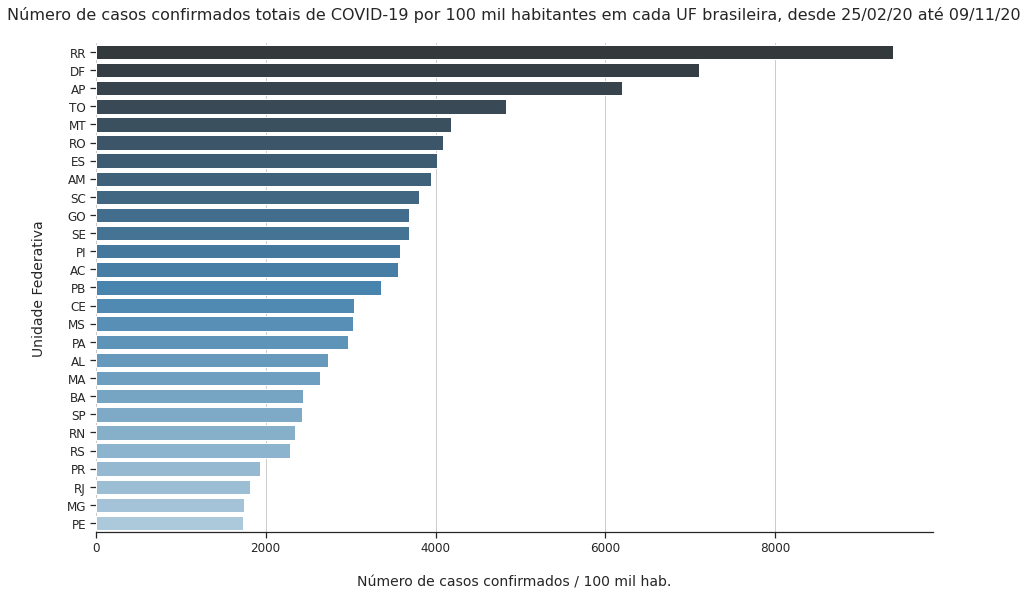

In [20]:
# Exibindo o gráfico dos casos acumulados / 100k
plt.figure(figsize=(15, 9))
sns.barplot(x='confirmed_per_100k_inhabitants', y='state', palette='Blues_r_d',
            data=classif_by_cases_per_100k_inhabitants)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('\nNúmero de casos confirmados / 100 mil hab.', fontsize=14)
plt.ylabel('Unidade Federativa\n', fontsize=14)
plt.title(f'Número de casos confirmados totais de COVID-19 por 100 mil habitantes em cada UF brasileira, desde 25/02/20 até 09/11/20\n',
          fontsize=16)
plt.grid(axis='x')
sns.despine(left=True)
plt.show()

Do gráfico e da tabela acima, conseguimos observar que:
- **Roraima** possui o maior número de casos confirmados / 100 mil habitantes, seguido por **Distrito Federal** e **Amapá**. Essas 3 UF's possuem números razoavelmente próximos entre si, e se destacam em relação a maioria.

- Em 100 mil habitantes, encontramos **8000** casos confirmados de corona em Roraima, o que indica que **8%** de sua população já sofreu com a contaminação da doença.

- No pódio, temos 2 UF's do **Norte** e 1 do **Centro-Oeste**.

Vamos observar agora os casos acumulados dos 3 Estados no topo, assim conseguiremos ter uma noção de tendência, de acordo com a inclinação das linhas.

In [21]:
# Separando algumas informações
wanted_states = ['RR', 'DF', 'AP']
top_state_cases = state_cases[state_cases['state'].isin(wanted_states)]
max_date = top_state_cases['date'].max().strftime('%d/%m/%y')
min_date = top_state_cases['date'].min().strftime('%d/%m/%y')
top_state_cases.head()

,date,state,confirmed,deaths,order_for_place,is_last,estimated_population,confirmed_per_100k_inhabitants,death_rate,deaths_per_100k_inhabitants,region,new_confirmed,new_deaths
719,2020-11-09,AP,53330,764,230,True,861773.0,6188.40460,0.0143,88.654437,Norte,320.0,13.0
720,2020-11-08,AP,53010,751,229,False,861773.0,6151.27185,0.0142,87.145919,Norte,178.0,0.0
721,2020-11-03,AP,52832,751,228,False,861773.0,6130.61676,0.0142,87.145919,Norte,179.0,2.0
722,2020-11-02,AP,52653,749,227,False,861773.0,6109.84563,0.0142,86.913839,Norte,153.0,1.0
723,2020-11-01,AP,52500,748,226,False,861773.0,6092.09154,0.0142,86.797799,Norte,325.0,0.0


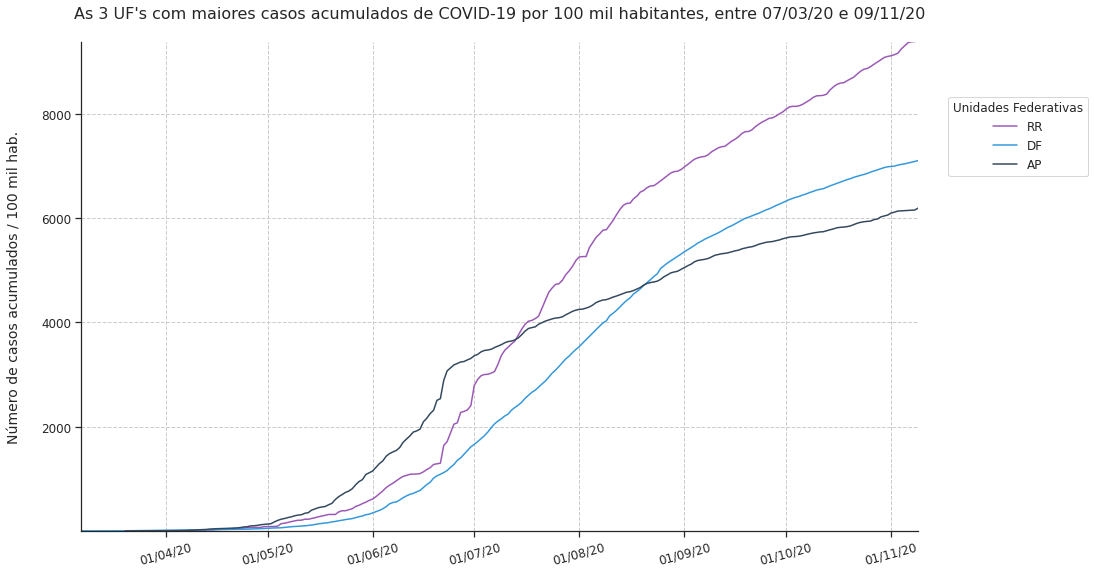

In [22]:
# Exibindo o gráfico dos casos acumulados / 100k
plt.figure(figsize=(15,9))
ax = sns.lineplot(x='date', y='confirmed_per_100k_inhabitants',
                  data=top_state_cases, hue='state', hue_order=wanted_states,
                  palette=['#9b59b6', '#3498db', '#34495e'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.margins(0)
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.legend(title='Unidades Federativas', fontsize=12, title_fontsize=12,
           bbox_to_anchor=(1.21, 0.9))
plt.ylabel('Número de casos acumulados / 100 mil hab.\n', fontsize=14)
plt.title(f"As 3 UF's com maiores casos acumulados de COVID-19 por 100 mil habitantes, entre {min_date} e {max_date}\n", fontsize=16)
plt.grid(linestyle='--')
sns.despine()
plt.show()

- A linha de **RR**, infelizmente, é a que possui **maior tendência de crescimento** nos últimos tempos, comparando com as 2 outras UF's.

- Até datas próximas e anteriores do mês de Julho, AP tinha a maior tendência de crescimento. Rapidamente foi passado por RR, e depois de aproximadamente 1,5 meses, por DF.

- O **Amapá** possui uma estranha mudança no sentido da linha (ainda bem), próximo do **começo de Julho**. Minha suposição é que, com o **aumento no número de leitos** e o **reforço no combate do novo coronavírus em aldeias indígenas**, alterou drásticamente a tendência de crescimento no número de casos, tal como é citado [nessa página de notícias](https://corona.portal.ap.gov.br/noticias?page=3).


Bom, pelo menos, todas essas UF's já apresentaram linhas mais inclinadas no passado, indicando que a taxa de crescimento do número de casos acumulados / 100 mil hab. diminuiu, o que é **positivo**.

Para finalizar, vou exibir o gráfico dos casos móveis diários de Roraima, a primeira colocada nas visualizações.

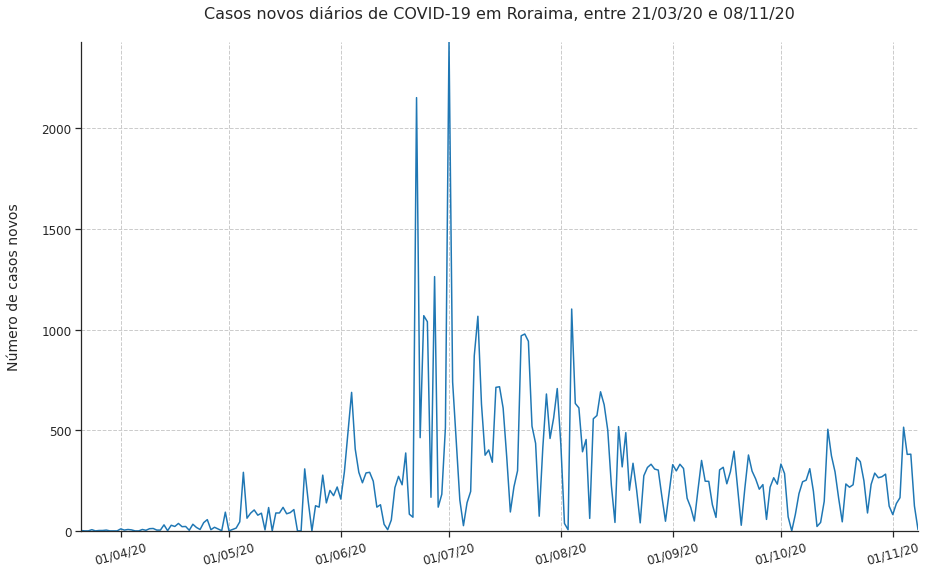

In [23]:
# Casos somente de RR
rr_cases = state_cases[state_cases['state'] == 'RR']
min_rr_date = rr_cases['date'].min().strftime('%d/%m/%y')
max_rr_date = rr_cases['date'].max().strftime('%d/%m/%y')

# Exibindo o gráfico móvel
plt.figure(figsize=(15,9))
ax = sns.lineplot(x='date', y='new_confirmed', data=rr_cases)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.margins(0)
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('Número de casos novos\n', fontsize=14)
plt.title(f'Casos novos diários de COVID-19 em Roraima, entre {min_rr_date} e {max_rr_date}\n', fontsize=16)
plt.grid(linestyle='--')
sns.despine()
plt.show()

O pico dos valores móveis diários foram perto de **Julho** e **Agosto**, demonstrando que a taxa de crescimento caiu sim, comparado a estes meses.

Roraima já foi pior, como apontam todas esses gráficos. Entretanto, os casos novos diários deste Estado já estão em **constância** desde, aproximadamente, **metade de Agosto**, sempre subindo e descendo entre uma certa faixa de valores.

Tudo isso mostra que, apesar da queda nessas tendências, os Estados ainda podem voltar a ter um novo surto, caso não haja um certo cuidado.

#### Mortes acumuladas / 100k

Da mesma forma dos casos confirmados, vou investigar a questão das mortes, ou seja, quais UF's possuem mais mortes por 100 mil habitantes até momento (09/11).

In [24]:
# Separando algumas informações
classif_by_deaths_per_100k_inhabitants = recent_cases.sort_values('deaths_per_100k_inhabitants',
                                                                  ascending=False)
classif_by_deaths_per_100k_inhabitants.head()

,date,state,confirmed,deaths,order_for_place,estimated_population,confirmed_per_100k_inhabitants,death_rate,deaths_per_100k_inhabitants,region,new_confirmed,new_deaths
1435,2020-11-09,DF,216861,3759,247,3055149.0,7098.21354,0.0173,123.038189,Centro-Oeste,472.0,7.0
4325,2020-11-09,RJ,316575,20905,240,17366189.0,1822.93882,0.0660,120.377591,Sudeste,405.0,0.0
2894,2020-11-09,MT,147429,3922,232,3526220.0,4180.93596,0.0266,111.223917,Centro-Oeste,584.0,8.0
482,2020-11-09,AM,165969,4644,237,4207714.0,3944.39831,0.0280,110.368718,Norte,305.0,19.0
5006,2020-11-08,RR,59195,695,230,631181.0,9378.45087,0.0117,110.111046,Norte,6.0,0.0


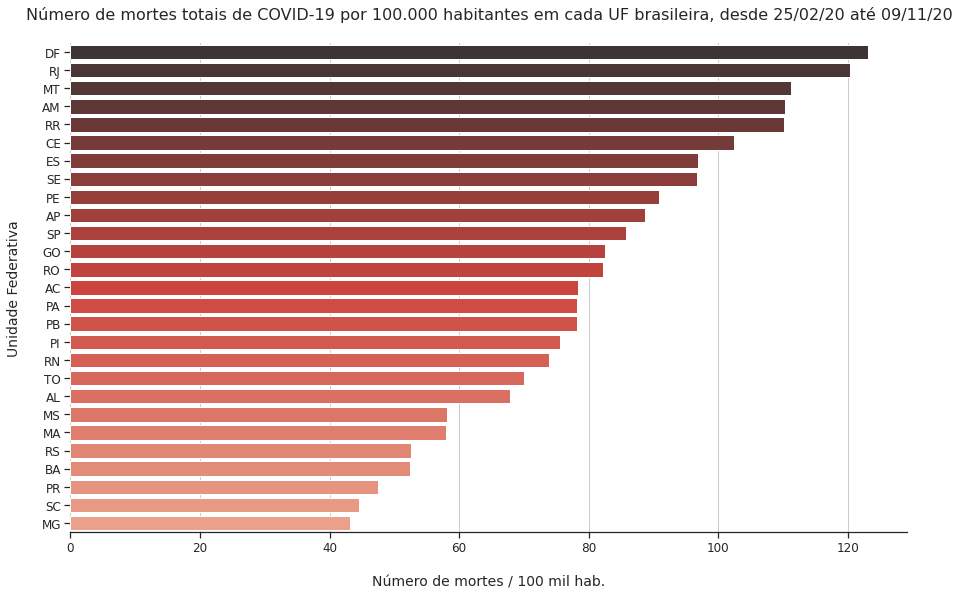

In [25]:
# Exibindo o gráfico das mortes acumuladas / 100k
plt.figure(figsize=(15, 9))
sns.barplot(x='deaths_per_100k_inhabitants', y='state', palette='Reds_r_d',
            data=classif_by_deaths_per_100k_inhabitants)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('\nNúmero de mortes / 100 mil hab.', fontsize=14)
plt.ylabel('Unidade Federativa\n', fontsize=14)
plt.title(f'Número de mortes totais de COVID-19 por 100.000 habitantes em cada UF brasileira, desde 25/02/20 até 09/11/20\n',
          fontsize=16)
plt.grid(axis='x')
sns.despine(left=True)
plt.show()

Aqui já aparecem UF's bem diferentes.
- No **Distrito Federal**, encontramos um pouco mais de **120** mortos por COVID-19 a cada 100 mil habitantes, seguido por **Rio de Janeiro** e **Mato Grosso**, com números próximos de **120** e **110**, respectivamente.

- O Estado do **Rio de Janeiro** é um caso que realmente me preocupa, pois estar em segundo lugar nesse gráfico, com uma das maiores populações do Brasil (3ª maior), de acordo com a tabela abaixo, significa que há um **número muito grande de mortos**, mesmo comparado com sua quantidade de habitantes.

- **AM** e **RR** seguem bem próximos do terceiro lugar neste gráfico.

Vamos ver como é o crescimento das mortes acumuladas por 100 mil habitantes das 3 primeiras UF's.


In [26]:
# Exibindo os Estados com maiores populações
recent_cases.sort_values('estimated_population', ascending=False).head()

,date,state,confirmed,deaths,order_for_place,estimated_population,confirmed_per_100k_inhabitants,death_rate,deaths_per_100k_inhabitants,region,new_confirmed,new_deaths
5949,2020-11-05,SP,1125936,39717,253,46289333.0,2432.38761,0.0353,85.801625,Sudeste,2637.0,168.0
2409,2020-11-09,MG,370991,9204,245,21292666.0,1742.34171,0.0248,43.226151,Sudeste,1035.0,0.0
4325,2020-11-09,RJ,316575,20905,240,17366189.0,1822.93882,0.0660,120.377591,Sudeste,405.0,0.0
949,2020-11-09,BA,363986,7818,247,14930634.0,2437.84691,0.0215,52.362143,Nordeste,840.0,22.0
4084,2020-11-09,PR,222831,5470,241,11516840.0,1934.82761,0.0245,47.495667,Sul,1623.0,78.0


In [27]:
# Separando algumas informações
wanted_states = ['DF', 'RJ', 'MT']
top_state_deaths = state_cases[state_cases['state'].isin(wanted_states)]
max_date = top_state_deaths['date'].max().strftime('%d/%m/%y')
min_date = top_state_deaths['date'].min().strftime('%d/%m/%y')
top_state_deaths.head()

,date,state,confirmed,deaths,order_for_place,is_last,estimated_population,confirmed_per_100k_inhabitants,death_rate,deaths_per_100k_inhabitants,region,new_confirmed,new_deaths
1435,2020-11-09,DF,216861,3759,247,True,3055149.0,7098.21354,0.0173,123.038189,Centro-Oeste,472.0,7.0
1436,2020-11-08,DF,216389,3752,246,False,3055149.0,7082.76421,0.0173,122.809068,Centro-Oeste,539.0,12.0
1437,2020-11-07,DF,215850,3740,245,False,3055149.0,7065.12186,0.0173,122.416288,Centro-Oeste,424.0,7.0
1438,2020-11-06,DF,215426,3733,244,False,3055149.0,7051.24365,0.0173,122.187167,Centro-Oeste,471.0,5.0
1439,2020-11-05,DF,214955,3728,243,False,3055149.0,7035.82706,0.0173,122.023509,Centro-Oeste,300.0,9.0


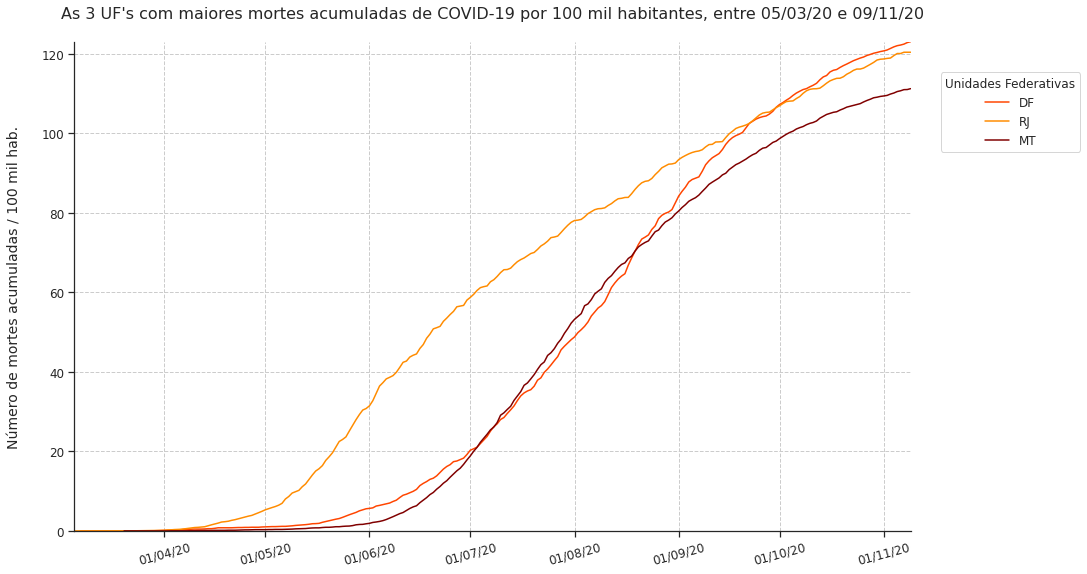

In [28]:
# Exibindo o gráfico das mortes acumuladas / 100k
plt.figure(figsize=(15,9))
ax = sns.lineplot(x='date', y='deaths_per_100k_inhabitants',
                  data=top_state_deaths, hue='state', hue_order=wanted_states,
                  palette=['#FF4500', '#FF8C00', '#800000'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.margins(0)
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.legend(title='Unidades Federativas', fontsize=12, title_fontsize=12,
           bbox_to_anchor=(1.21, 0.95))
plt.ylabel('Número de mortes acumuladas / 100 mil hab.\n', fontsize=14)
plt.title(f"As 3 UF's com maiores mortes acumuladas de COVID-19 por 100 mil habitantes, entre {min_date} e {max_date}\n", fontsize=16)
plt.grid(linestyle='--')
sns.despine()
plt.show()

- **Rio de Janeiro** teve uma alavancada no número de mortes por 100 mil habitantes em **Maio**, e vem decaindo sua taxa de crescimento conforme se passa o tempo, mas que ainda permanece alta. Pode parecer coincidência, mas justamente no mês de Maio, o Rio começou a adotar medidas mais rígidas de isolamento social, tal como [essa fonte](https://odia.ig.com.br/rio-de-janeiro/2020/05/5914144-lockdown-contra-a-covid-19.html) nos mostra, provavelmente acarretando na diminuição no número de casos e consequentemente, no número de mortes. 

- Desde **Julho até meados de Setembro**, a taxa de crescimento do número de óbitos acumulados em **DF** foi bem assustador, ainda bem que após esse período, essa taxa diminuiu, entretanto continua parecida com a taxa do RJ.

Assim como no caso dos casos confirmados, essas taxas de crescimento **diminuíram**, mostrando que menos mortes por dia estão acontecendo.

Exibirei agora os casos móveis de morte no DF, a primeira colocada nessas visualizações.

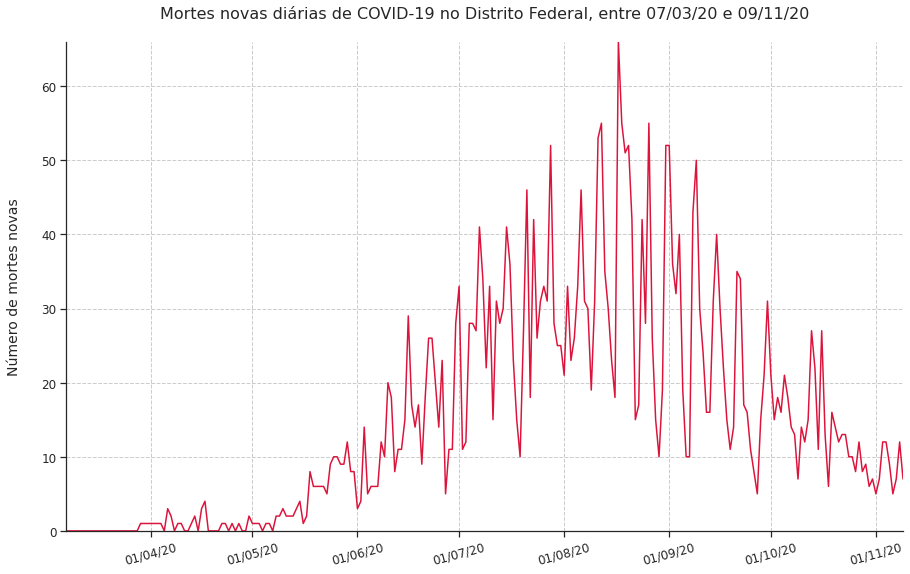

In [29]:
# Mortes novas de DF
df_cases = state_cases[state_cases['state'] == 'DF']
min_df_date = df_cases['date'].min().strftime('%d/%m/%y')
max_df_date = df_cases['date'].max().strftime('%d/%m/%y')

# Exibir gráfico móvel
plt.figure(figsize=(15,9))
ax = sns.lineplot(x='date', y='new_deaths', data=df_cases, color='crimson')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.margins(0)
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('Número de mortes novas\n', fontsize=14)
plt.title(f'Mortes novas diárias de COVID-19 no Distrito Federal, entre {min_df_date} e {max_df_date}\n', fontsize=16)
plt.grid(linestyle='--')
sns.despine()
plt.show()

Como já relatado acima, o DF obteve números de mortes novas diárias muito grandes entre Julho e meados de Setembro. Ao menos esse "zig e zag" da linha se mantém abaixo da casa dos 20, o que é bem positivo, mas que ainda assim, precisa de atenção.

Após todas essas análises de gráficos, concluímos que, apesar de todas essas tendências estarem caindo, **não é recomendável** a volta da normalidade, simplesmente pelo fato de que as taxas de crescimento estão se estabilizando mas não chegaram próximas do 0, além de que, obviamente, a vacina ainda não existe.

### Análise das regiões brasileiras

Aqui iremos observar como é o comportamento dos casos e mortes por COVID-19 de cada região brasileira.

Da mesma forma que na análise das UF's, farei a interpretação do número de pessoas por 100 mil habitantes, pelo mesmo motivo citado anteriormente.

In [30]:
wanted_columns = ['confirmed', 'deaths', 'estimated_population']
recent_cases_by_region = recent_cases.groupby('region')[wanted_columns].sum()
recent_cases_by_region = recent_cases_by_region.reset_index()
confirmed_per_100k = recent_cases_by_region['confirmed'] * 100000 / recent_cases_by_region['estimated_population']
deaths_per_100k = recent_cases_by_region['deaths'] * 100000 / recent_cases_by_region['estimated_population']
recent_cases_by_region['confirmed_per_100k'] = confirmed_per_100k
recent_cases_by_region['deaths_per_100k'] = deaths_per_100k
recent_cases_by_region = recent_cases_by_region.sort_values('deaths_per_100k',
                                                            ascending=False)
display(recent_cases_by_region)

,region,confirmed,deaths,estimated_population,confirmed_per_100k,deaths_per_100k
0,Centro-Oeste,712138,15189,16504303.0,4314.862615,92.030545
2,Norte,810791,18469,22024134.0,3681.375168,83.858008
3,Sudeste,1976574,73764,89012240.0,2220.564273,82.869502
1,Nordeste,1419183,40591,54022700.0,2627.012349,75.136933
4,Sul,760142,14698,30192315.0,2517.667161,48.681262


In [31]:
df_melted = pd.melt(recent_cases_by_region, id_vars='region', 
                    value_vars=['confirmed_per_100k', 'deaths_per_100k'])
df_melted['variable'] = df_melted['variable'].replace('confirmed_per_100k',
                                                      'Casos acumulados / 100 mil hab.')
df_melted['variable'] = df_melted['variable'].replace('deaths_per_100k',
                                                      'Mortes acumuladas / 100 mil hab.')

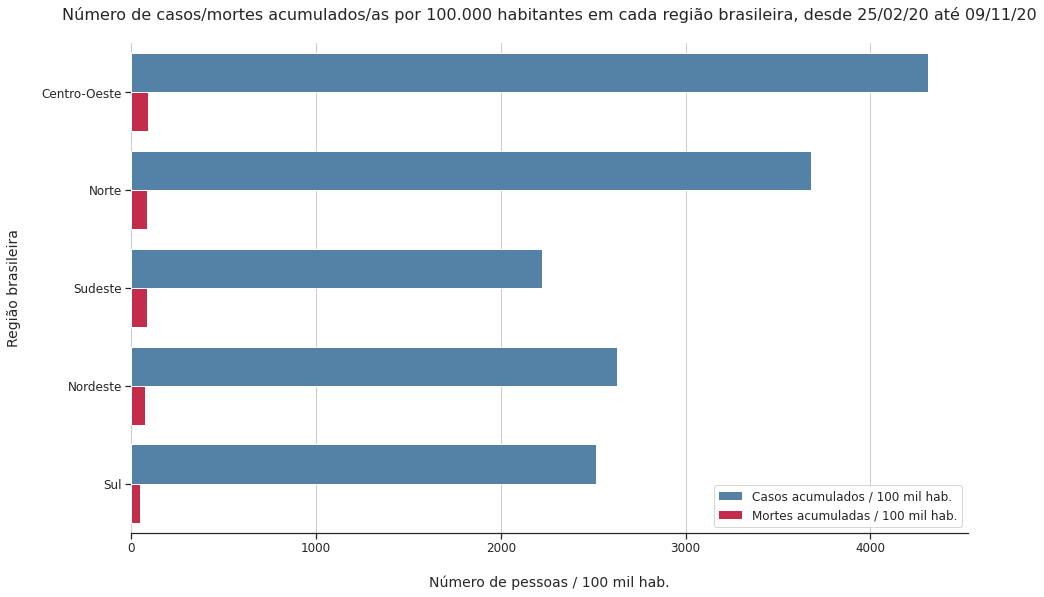

In [32]:
plt.figure(figsize=(15, 9))
sns.barplot(x='value', y='region', hue='variable', data=df_melted, ci=False,
            palette=['steelblue', 'crimson'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='', fontsize=12)
plt.xlabel('\nNúmero de pessoas / 100 mil hab.', fontsize=14)
plt.ylabel('Região brasileira\n', fontsize=14)
plt.title(f'Número de casos/mortes acumulados/as por 100.000 habitantes em cada região brasileira, desde 25/02/20 até 09/11/20\n',
          fontsize=16)
plt.grid(axis='x')
sns.despine(left=True)
plt.show()

**Observação:** esse gráfico está ordenado pelas barras vermelhas, do maior para o menor.

Notemos que, apesar do **Sudeste** apresentar, aproximadamente, a **metade** dos casos acumulados / 100 mil hab. do Centro-Oeste, essa região fica em terceiro no número de óbitos acumulados / 100 mil hab.

Além disso, nesse gráfico vemos **Centro-Oeste** com a **maior** quantidade de casos e mortes acumuladas por 100 mil hab. até o momento (09/11). Proporcionalmente à própria população, esse é o pior estado entre as regiões.

Mas será que os Estados mais urgentes são os do Centro-Oeste?

Para isso, vou plotar a ordem decrescente, dos Estados com maiores casos e mortes acumuladas por 100 mil habitantes.

In [33]:
print('Ordem dos casos acumulados por 100 mil hab.:')
print(list(classif_by_cases_per_100k_inhabitants['state']),'\n')
print('Ordem dos óbitos acumulados por 100 mil hab.:')
print(list(classif_by_deaths_per_100k_inhabitants['state']))

Ordem dos casos acumulados por 100 mil hab.:
['RR', 'DF', 'AP', 'TO', 'MT', 'RO', 'ES', 'AM', 'SC', 'GO', 'SE', 'PI', 'AC', 'PB', 'CE', 'MS', 'PA', 'AL', 'MA', 'BA', 'SP', 'RN', 'RS', 'PR', 'RJ', 'MG', 'PE'] 

Ordem dos óbitos acumulados por 100 mil hab.:
['DF', 'RJ', 'MT', 'AM', 'RR', 'CE', 'ES', 'SE', 'PE', 'AP', 'SP', 'GO', 'RO', 'AC', 'PA', 'PB', 'PI', 'RN', 'TO', 'AL', 'MS', 'MA', 'RS', 'BA', 'PR', 'SC', 'MG']


Podemos ver que algumas UF's aparecem nas primeiras posições, são estas: **DF** e **MT**. Os outros (GO e MS) estão em posições mais distantes. Portanto, além da região Centro-Oeste ser a mais afetada, temos 2 UF's (DF e MT) que estão subindo bastante esse número.

Além do Centro-Oeste, temos a região **Norte** bem preocupante. Esta apresenta o segundo maior número de casos e óbitos acumulados, por 100 mil hab. Infelizmente, também temos algumas UF's desta região que estão em posições críticas, tanto nos casos quanto nos óbitos acumulados, por 100 mil hab.

Vamos ver as curvas de crescimento desses dados, por regiâo.

In [34]:
# Algumas manipulações para as colunas de pessoas por 100 mil habitantes
wanted_columns = ['confirmed', 'deaths', 'estimated_population',
                  'new_confirmed', 'new_deaths']
region_cases = state_cases.groupby(['region','date'])[wanted_columns].sum()
region_cases['confirmed_per_100k_inhabitants'] = region_cases['confirmed'] * 100000 / region_cases['estimated_population']
region_cases['deaths_per_100k_inhabitants'] = region_cases['deaths'] * 100000 / region_cases['estimated_population']
region_cases = region_cases.reset_index()
region_cases.head()

,region,date,confirmed,deaths,estimated_population,new_confirmed,new_deaths,confirmed_per_100k_inhabitants,deaths_per_100k_inhabitants
0,Centro-Oeste,2020-03-07,1,0,3055149.0,1.0,0.0,0.032732,0.0
1,Centro-Oeste,2020-03-08,1,0,3055149.0,0.0,0.0,0.032732,0.0
2,Centro-Oeste,2020-03-09,1,0,3055149.0,0.0,0.0,0.032732,0.0
3,Centro-Oeste,2020-03-10,1,0,3055149.0,0.0,0.0,0.032732,0.0
4,Centro-Oeste,2020-03-11,2,0,3055149.0,1.0,0.0,0.065463,0.0


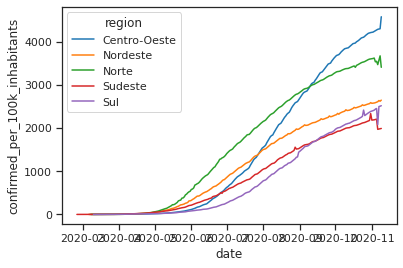

In [35]:
# Exibindo o gráfico dos casos acumulados / 100k
sns.lineplot(x='date', y='confirmed_per_100k_inhabitants', 
             hue='region', data=region_cases)

Além da visualização ainda estar ruim, notei que existem algumas coisas estranhas:
- Depois de Novembro, os dados começam a ficam bem estranhos, os casos acumulados caem, alguns aumentam do nada...
- Existem alguns saltos e quedas estranhas em alguns dias, depois voltam a normalidade.

Acho que a melhor escolha a se fazer, para esse tipo de coisa, é selecionar os dados anteriores a Novembro e retirar esses dias que apresentam essas inconscistências.


In [36]:
# Selecionando datas anteriores a Novembro
region_cases = region_cases[region_cases['date'] < '2020-11']

In [37]:
# Funções necessárias para achar picos e quedas
def isPeak(arr, n, num, i, j): 
    if (i >= 0 and arr[i] > num): 
        return False
  
    if (j < n and arr[j] > num): 
        return False
    return True
  
def isTrough(arr, n, num, i, j): 
    if (i >= 0 and arr[i] < num): 
        return False
  
    if (j < n and arr[j] < num): 
        return False
    return True
  
def find_peaks_troughs_indexes(arr, n):
  peaks_and_troughs = []
  for i in range(n): 
      if (isPeak(arr, n, arr[i], i - 1, i + 1)): 
          peaks_and_troughs.append(i)
  
  for i in range(n): 
      if (isTrough(arr, n, arr[i], i - 1, i + 1)): 
          peaks_and_troughs.append(i)
  return peaks_and_troughs

In [38]:
# Separando os dataframes por regiões
midwest = region_cases[region_cases['region'] == 'Centro-Oeste'].sort_values('date')
northest = region_cases[region_cases['region'] == 'Nordeste'].sort_values('date')
north = region_cases[region_cases['region'] == 'Norte'].sort_values('date')
southeast = region_cases[region_cases['region'] == 'Sudeste'].sort_values('date')
south = region_cases[region_cases['region'] == 'Sul'].sort_values('date')

region_dfs = [midwest, northest, north, southeast, south]

In [39]:
wanted_columns = ['confirmed', 'deaths', 'confirmed_per_100k_inhabitants', 
                  'deaths_per_100k_inhabitants']
for column in wanted_columns:
  for df in region_dfs:
    n = len(df)
    df.index = range(n)
    data = np.array(df[column])
    peaks_troughs_indexes = find_peaks_troughs_indexes(data, n)

# Completando as colunas com valores NaN
    for index, row in df.iterrows():
      for i in peaks_troughs_indexes:
        if index == i:
          df.loc[index, column] = np.nan

In [40]:
# Retirando as linhas com valores vazios nas colunas desejadas
region_cases = pd.concat(region_dfs)
region_cases.index = range(len(region_cases))
region_cases = region_cases.dropna()

#### Casos acumulados / 100k

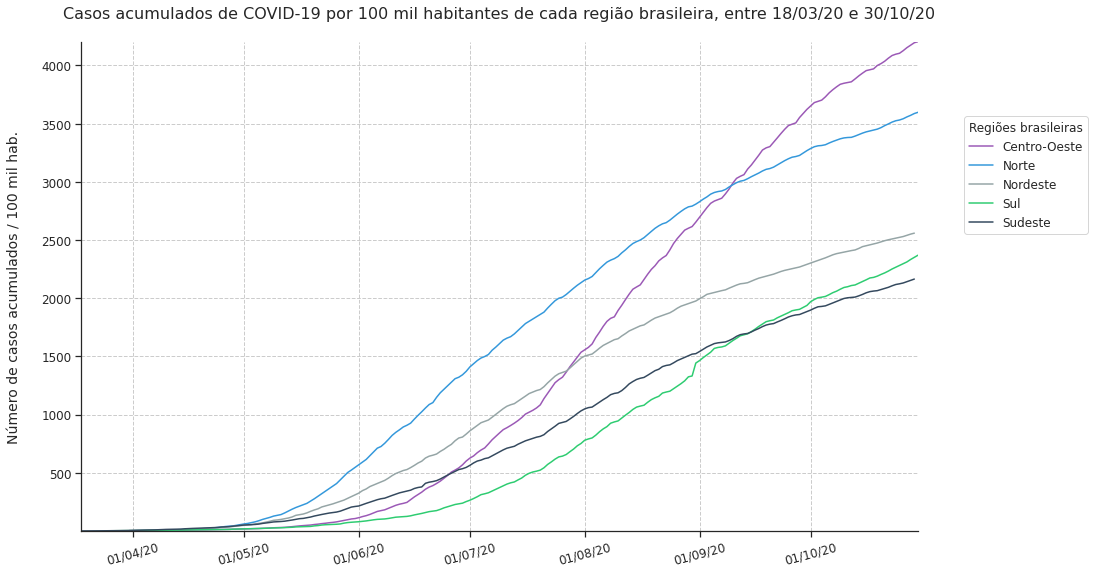

In [41]:
# Separando algumas informações
min_date = region_cases['date'].min().strftime('%d/%m/%y')
max_date = region_cases['date'].max().strftime('%d/%m/%y')
palette = ['#9b59b6', '#3498db', '#95a5a6', '#2ecc71', '#34495e']

# Exibindo o gráfico dos casos acumulados / 100k
plt.figure(figsize=(15,9))
ax = sns.lineplot(x='date', y='confirmed_per_100k_inhabitants', 
                  data=region_cases, hue='region', palette=palette,
                  hue_order=['Centro-Oeste', 'Norte', 'Nordeste',
                             'Sul', 'Sudeste'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.margins(0)
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.legend(title='Regiões brasileiras', fontsize=12, title_fontsize=12,
           bbox_to_anchor=(1.21, 0.86))
plt.ylabel('Número de casos acumulados / 100 mil hab.\n', fontsize=14)
plt.title(f"Casos acumulados de COVID-19 por 100 mil habitantes de cada região brasileira, entre {min_date} e {max_date}\n", fontsize=16)
plt.grid(linestyle='--')
sns.despine()
plt.show()

Do gráfico acima, nota-se que:
- **Centro-Oeste** em Junho, tinha o segundo menor número de casos acumulados por 100 mil habitantes, e recentemente (dia 30/10) está no **pior** caso entre as regiões brasileiras.

- **Centro-Oeste**, desde meados de Julho até próximo de Outubro, teve a **pior tendência de aumento** no número de casos acumulados / 100 mil habitantes, isso em relação à própria região, quanto aos outros históricos do resto das regiões.

- **Centro-Oeste** e **Norte** são Regiões em que os números estão bem próximos, ou seja, deve-se tomar mais cuidado e adotar medidas não tão flexíveis.

- Mesmo que pouco, essas tendências estão abaixando gradualmente, porém não é a hora certa para voltarmos com as atividades normais.

Vamos ver os casos novos do Centro-Oeste, o primeiro colocado nos gráficos.

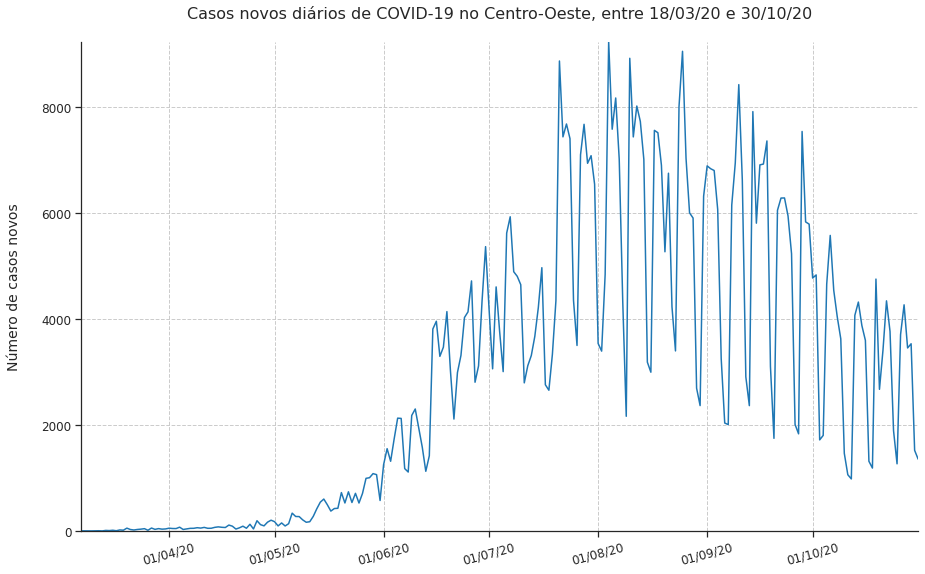

In [42]:
# Exibindo o gráfico móvel
plt.figure(figsize=(15,9))
ax = sns.lineplot(x='date', y='new_confirmed', data=midwest)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.margins(0)
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('Número de casos novos\n', fontsize=14)
plt.title(f'Casos novos diários de COVID-19 no Centro-Oeste, entre {min_date} e {max_date}\n', fontsize=16)
plt.grid(linestyle='--')
sns.despine()
plt.show()

Realmente, foi basicamente o que concluímos anteriormente.

Pelo menos, esses casos diários já vêm diminuindo desde **Outubro**, mas é aquela coisa, ainda estão **altos**!

Por isso que, se ficássemos um período mais longo com medidas mais rígidas, o cenário histórico, não só do Centro-Oeste, mas das outras regiões, com certeza seriam diferentes.

#### Mortes acumuladas / 100k

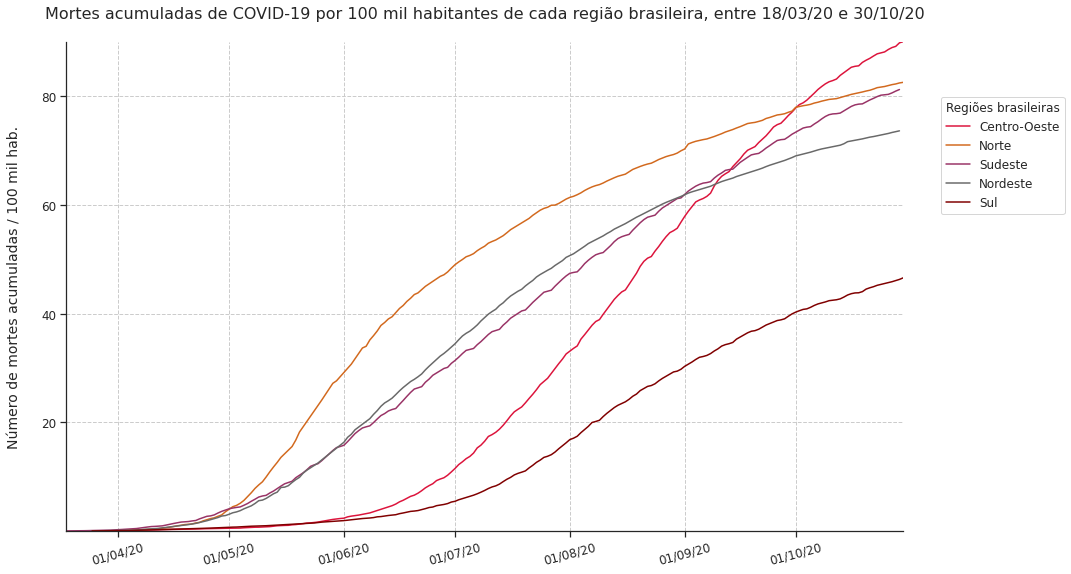

In [43]:
# Exibindo o gráfico das mortes acumuladas / 100k
palette = ['#DC143C', '#D2691E', '#993366', '#696969', '#800000']

plt.figure(figsize=(15,9))
ax = sns.lineplot(x='date', y='deaths_per_100k_inhabitants', 
                  data=region_cases, hue='region', palette=palette,
                  hue_order=['Centro-Oeste', 'Norte', 'Sudeste',
                             'Nordeste', 'Sul'])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.margins(0)
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.legend(title='Regiões brasileiras', fontsize=12, title_fontsize=12,
           bbox_to_anchor=(1.2, 0.9))
plt.ylabel('Número de mortes acumuladas / 100 mil hab.\n', fontsize=14)
plt.title(f"Mortes acumuladas de COVID-19 por 100 mil habitantes de cada região brasileira, entre {min_date} e {max_date}\n", fontsize=16)
plt.grid(linestyle='--')
sns.despine()
plt.show()

- Mais uma vez, o caso do **Centro-Oeste** é bem preocupante, primeiro por apresentar a **maior taxa de crescimento** no número de mortes acumuladas / 100 mil hab., segundo porque é o **maior** número no final do período.

- Nesse caso, devemos olhar bem para a região **Sudeste**. Apesar de estar em terceiro no dia 30/10, devemos lembrar que é a região mais populosa do país, e se esse número é grande, existem **muitas** pessoas que já foram ao óbito, e essa tendência de crescimento foi a **segunda pior** no final do período.

- Vemos que o **Sul** tem aproximadamente **metade** das mortes acumuladas / 100 mil hab. de todas as outras regiões, além de que estes terminam o período com valores bem **próximos** entre si.

Abaixo está o gráfico móvel diário das mortes do Centro-Oeste.


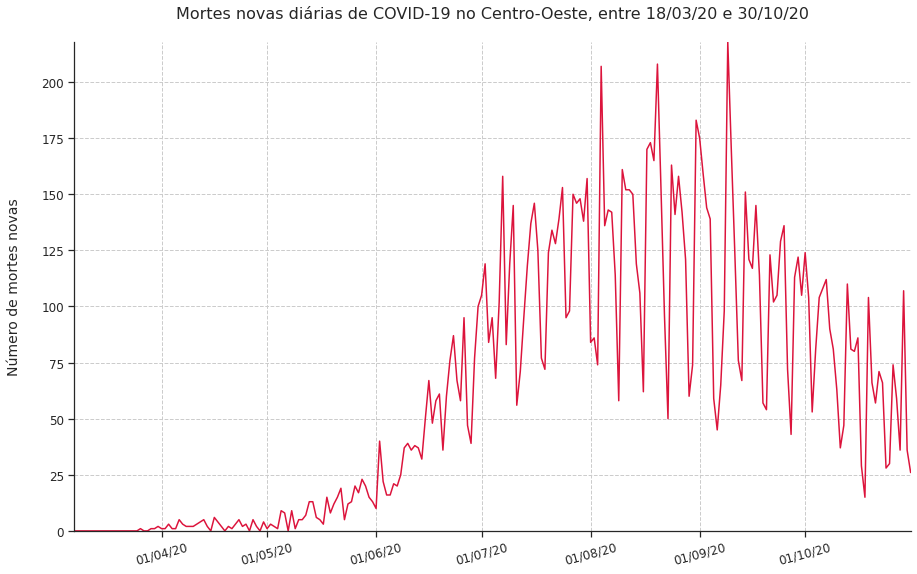

In [44]:
# Exibir gráfico móvel
plt.figure(figsize=(15,9))
ax = sns.lineplot(x='date', y='new_deaths', data=midwest, color='crimson')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.margins(0)
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('Número de mortes novas\n', fontsize=14)
plt.title(f'Mortes novas diárias de COVID-19 no Centro-Oeste, entre {min_date} e {max_date}\n', fontsize=16)
plt.grid(linestyle='--')
sns.despine()
plt.show()

Atualmente, o número de mortes se assemelha bastante com o que acontecia no mês de **Julho**, e aparentemente, os valores mais altos apareceram entre **Agosto** e **Setembro**.

Novamente, não é hora de termos medidas muito flexíveis. Os números de todas as regiões ainda permanecem **altas**.

Para finalizar, vamos ver situação do nosso país.

### Análise do Brasil como um todo

Essa seção vai tratar de como os casos confirmados e as mortes progrediram conforme foi-se passando o tempo.

Dessa vez não há motivos de trabalharmos com números em 100 mil habitantes, justamente porque não estamos comparando com nenhum outro caso.

Enfim, trabalharei em algumas manipulações com o Pandas e plotarei alguns gráficos.

In [45]:
# Criando colunas com números por 100 mil habitantes
wanted_columns = ['confirmed', 'deaths', 'new_confirmed', 'new_deaths',
                  'confirmed_per_100k_inhabitants',
                  'deaths_per_100k_inhabitants']
brasil_cases = state_cases.groupby('date')[wanted_columns].sum()
brasil_cases = brasil_cases.reset_index()
brasil_cases.head()

,date,confirmed,deaths,new_confirmed,new_deaths,confirmed_per_100k_inhabitants,deaths_per_100k_inhabitants
0,2020-02-25,1,0,1.0,0.0,0.00216,0.0
1,2020-02-26,1,0,0.0,0.0,0.00216,0.0
2,2020-02-27,1,0,0.0,0.0,0.00216,0.0
3,2020-02-28,2,0,1.0,0.0,0.00432,0.0
4,2020-02-29,2,0,0.0,0.0,0.00432,0.0


Pelo mesmo motivo da análise das regiões, vou pegar as datas antes de Novembro.

In [46]:
# Dados antes de Novembro
brasil_cases = brasil_cases[brasil_cases['date'] < '2020-11']
brasil_cases.tail()

,date,confirmed,deaths,new_confirmed,new_deaths,confirmed_per_100k_inhabitants,deaths_per_100k_inhabitants
245,2020-10-27,5445189,158052,29982.0,526.0,92642.74964,2120.607105
246,2020-10-28,5473540,158556,28351.0,504.0,93056.86135,2125.984104
247,2020-10-29,5500240,159107,26700.0,551.0,93485.09388,2132.692566
248,2020-10-30,5524593,159680,24353.0,573.0,93823.13885,2137.852329
249,2020-10-31,5097274,148371,13170.0,292.0,90056.52221,2026.237908


In [47]:
# Fazendo o mesmo processo da análise das regiões, retirando
# os picos e as quedas do dataframe
wanted_columns = ['confirmed', 'deaths', 'confirmed_per_100k_inhabitants',
                  'deaths_per_100k_inhabitants']
for column in wanted_columns:
  n = len(brasil_cases)
  brasil_cases.index = range(n)
  data = np.array(brasil_cases[column])
  peaks_troughs_indexes = find_peaks_troughs_indexes(data, n)

  for index, row in df.iterrows():
    for i in peaks_troughs_indexes:
      if index == i:
        brasil_cases.loc[index, column] = np.nan
  brasil_cases = brasil_cases.dropna()

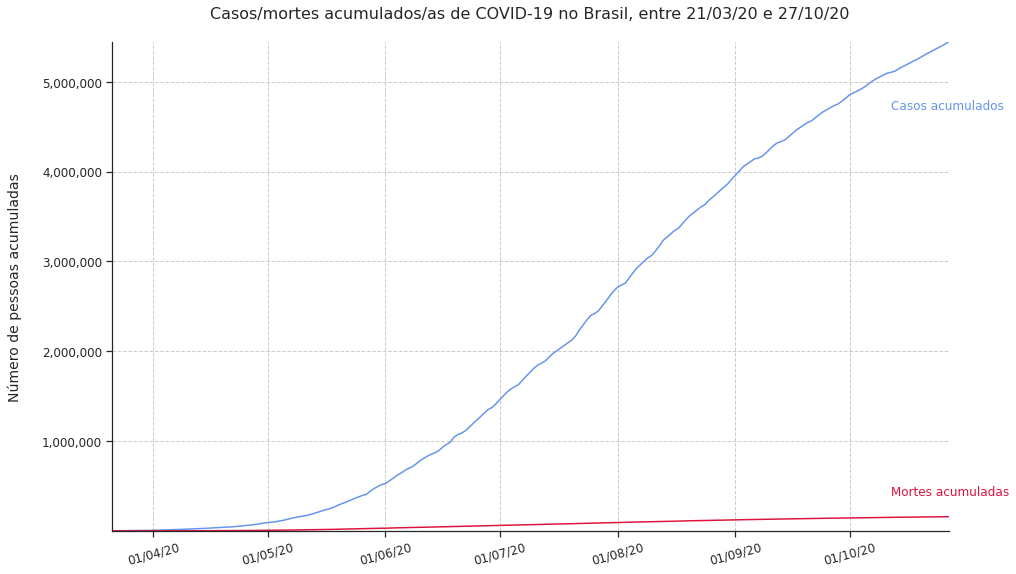

In [48]:
# Separando algumas informações
min_date = brasil_cases['date'].min().strftime('%d/%m/%y')
max_date = brasil_cases['date'].max().strftime('%d/%m/%y')

# Exibindo o gráfico dos casos acumulados / 100k
plt.figure(figsize=(15,9))
ax = sns.lineplot(x='date', y='confirmed', data=brasil_cases,
                  color='cornflowerblue')
sns.lineplot(x='date', y='deaths', data=brasil_cases, color='crimson')
ax.text(dt.date(2020, 10, 12), 4700000, 'Casos acumulados', 
        color='cornflowerblue', fontsize=12)
ax.text(dt.date(2020, 10, 12), 400000, 'Mortes acumuladas', color='crimson',
        fontsize=12)
plt.margins(0)
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.xlabel('')
plt.ylabel('Número de pessoas acumuladas\n', fontsize=14)
plt.title(f"Casos/mortes acumulados/as de COVID-19 no Brasil, entre {min_date} e {max_date}\n", fontsize=16)
plt.grid(linestyle='--')
sns.despine()
plt.show()

Felizmente, a taxa de crescimento de mortes acumuladas é extremamente diferente que a de casos acumulados. Isso significa que, falando em porcentagens, o número de pessoas que morrem em relação aos que pegam COVID-19 decresce a cada dia.

Vamos ver quanto que é essa `death_ratio` do Brasil, no dia 27/10, além dos valores atuais de casos e mortes acumuladas.

In [49]:
# Calculando death_ratio
brasil_cases['death_ratio_pct'] = brasil_cases['deaths'] *100 / brasil_cases['confirmed']

In [50]:
# Exibindo valores da última linha
pd.options.display.float_format = '{:,.2f}'.format
last_data = brasil_cases.iloc[-1]
print(last_data)

date                              2020-10-27 00:00:00
confirmed                                5,445,189.00
deaths                                     158,052.00
new_confirmed                               29,982.00
new_deaths                                     526.00
confirmed_per_100k_inhabitants              92,642.75
deaths_per_100k_inhabitants                  2,120.61
death_ratio_pct                                  2.90
Name: 182, dtype: object


Ta aí, temos um valor de 2,9% de óbitos do total de contaminados por COVID-19, na data de 27/10.

A seguir, temos os gráficos móveis dos casos e mortes acumuladas.

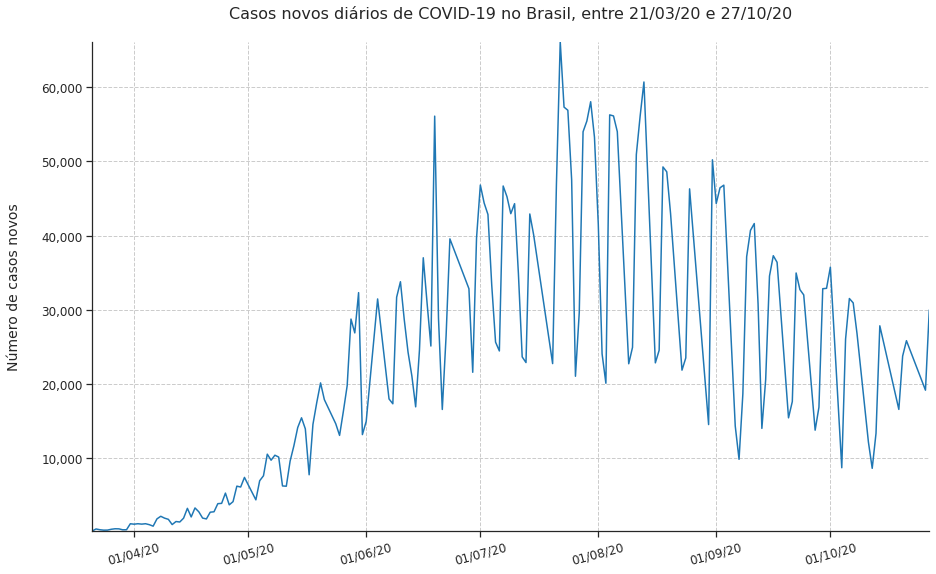

In [51]:
# Exibindo o gráfico móvel
plt.figure(figsize=(15, 9))
ax = sns.lineplot(x='date', y='new_confirmed', data=brasil_cases)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.margins(0)
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('Número de casos novos\n', fontsize=14)
plt.title(f'Casos novos diários de COVID-19 no Brasil, entre {min_date} e {max_date}\n',
          fontsize=16)
plt.grid(linestyle='--')
sns.despine()
plt.show()

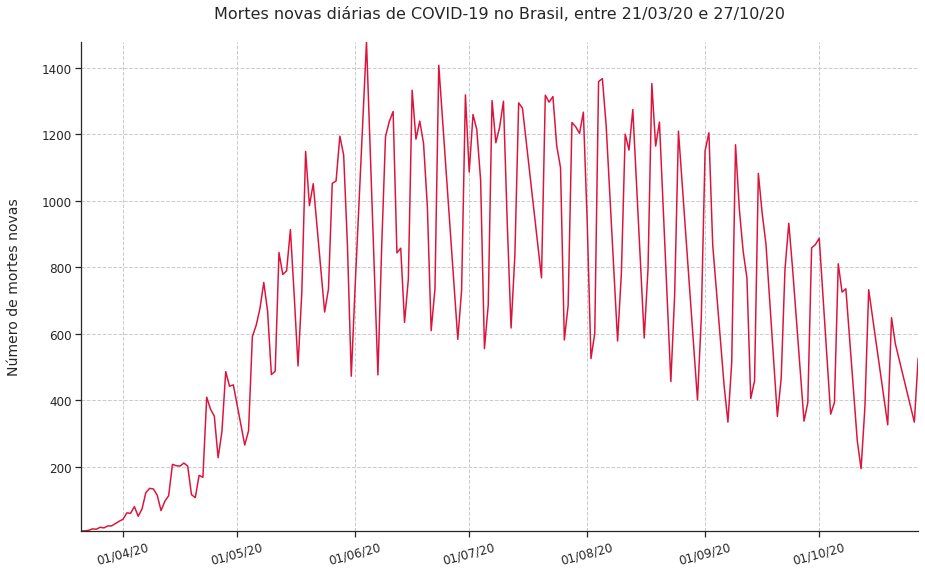

In [52]:
# Exibir gráfico móvel
plt.figure(figsize=(15, 9))
ax = sns.lineplot(x='date', y='new_deaths', data=brasil_cases,
                  color='crimson')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%y'))
plt.margins(0)
plt.xticks(rotation=15, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('Número de mortes novas\n', fontsize=14)
plt.title(f'Mortes novas diárias de COVID-19 no Brasil, entre {min_date} e {max_date}\n',
          fontsize=16)
plt.grid(linestyle='--')
sns.despine()
plt.show()

Observamos que:
- Os casos novos diários da doença apresentam seus valores máximos próximo do mês de **Agosto**. Já nas mortes novas diárias, os valores máximos se extendem entre os meses de **Junho** e **Agosto**.

- Em ambos os gráficos, os casos sobem, alcançam valores máximos, e decaem no final.



## Conclusão

Mesmo que, como dito no resumo, os valores estão melhorando, **não podemos achar que estamos tranquilos**. Por mais que tudo aparenta estar melhor, se nós bobearmos, podemos sim voltar a ter números maiores...

<center><img src='https://raw.githubusercontent.com/Emersonmiady/bootcamp-alura-ds/main/modulo_1/figures/washing-hands.jpg' width='800' height='500'></center>

É por isso que, se todos os Estados não flexibilizarem tanto o isolamento social, quanto se **nós** fizermos nossa parte, tal como:
- Lavar as mãos de forma correta e frequentemente;
- Evitarmos ao máximo sair para as ruas, apenas para o necessário;
- Utilizar máscaras;
- Passarmos, também de forma frequente, álcool em gel.

Conseguiremos sim passar por tempos melhores, diminuindo ainda mais esses números que discutimos nesse notebook!

Enfim, muito obrigado pela atenção! :)